<a href="https://colab.research.google.com/github/2303a52223/EXLAI-B-42./blob/main/EXPLAINABLE__LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Green Cycle – E-Bike Company

 ##Context:
   Green Cycle tracks how many social media reels affect demo test ride bookings.
Instagram Reels (x)   Test Rides (y)
1    20
2   35
3   48
1   25
2    38

   Objective:
              Analyze the effect of Instagram reel postings on the number of test ride bookings for        
Green Cycle by performing Linear Regression and interpreting SHAP values.
   Requirements:
1. Perform Linear Regression Analysis
o Use the given dataset where:
• Independent Variable (x): Instagram Reels
• Dependent Variable (y): Test Rides
2. Calculate the Baseline Value
o Compute the mean of all test ride values (y values).
3. Calculate SHAP Values
o For each record, calculate the difference between the predicted value and the baseline.
o This difference is the SHAP value, attributed to the number of Instagram reels.
4. Compute Final Prediction
o Use the linear regression model to calculate predicted test rides for each reel count.
o Confirm that:
Final Prediction = Baseline + SHAP Value
5. Interpret the Results
o Explain how the number of Instagram reels influenced each predicted test ride count.
o Compare the predicted value to the actual value for each row.
o Identify under prediction or over prediction, and provide reasoning.
     



Deliverables:
          A notebook or document containing:

              • Linear regression implementation with coefficients
              • Baseline (mean of y)
              • Table of SHAP values and predictions
              • Explanation of how each input influenced the prediction
              • Comparison of predicted vs actual values, with over/under prediction notes
              • Summary analysis covering:
              ◦ Accuracy of the model
              ◦ Trend analysis
              ◦ SHAP interpretation insights ##

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


data = {
    'Instagram Reels (x)': [1, 2, 3, 1, 2],
    'Test Rides (y)': [20, 35, 48, 25, 38]
}
df = pd.DataFrame(data)
X = df[['Instagram Reels (x)']]
y = df['Test Rides (y)']


model = LinearRegression()
model.fit(X, y)


slope = model.coef_[0]
intercept = model.intercept_
baseline = y.mean()


df['Predicted Test Rides'] = model.predict(X)
df['SHAP Value'] = df['Predicted Test Rides'] - baseline


df['Verification'] = baseline + df['SHAP Value']

df['Difference'] = df['Predicted Test Rides'] - df['Test Rides (y)']
df['Prediction Type'] = np.where(df['Difference'] > 0, 'Overprediction',
                                np.where(df['Difference'] < 0, 'Underprediction', 'Exact'))


print("Linear Regression Results:")
print(f"Slope (Coefficient for Instagram Reels): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Baseline (mean of y): {baseline:.2f}\n")

print("Detailed Analysis Table:")
print(df.to_string(index=False))

from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y, df['Predicted Test Rides'])
r2 = r2_score(y, df['Predicted Test Rides'])

print("\nModel Accuracy Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Linear Regression Results:
Slope (Coefficient for Instagram Reels): 12.93
Intercept: 9.93
Baseline (mean of y): 33.20

Detailed Analysis Table:
 Instagram Reels (x)  Test Rides (y)  Predicted Test Rides  SHAP Value  Verification  Difference Prediction Type
                   1              20             22.857143  -10.342857     22.857143    2.857143  Overprediction
                   2              35             35.785714    2.585714     35.785714    0.785714  Overprediction
                   3              48             48.714286   15.514286     48.714286    0.714286  Overprediction
                   1              25             22.857143  -10.342857     22.857143   -2.142857 Underprediction
                   2              38             35.785714    2.585714     35.785714   -2.214286 Underprediction

Model Accuracy Metrics:
Mean Absolute Error: 1.74
R-squared Score: 0.96


2.GoFit – Gym Membership Signups using Multiple Linear
Regression and SHAP Analysis  
Objective:
Analyze how trainer availability and advertising spend influence new gym membership signups using
Multiple Linear Regression and interpret results using SHAP values.
Given Dataset:
Trainer
 s (x₁)  :5,4,6,3,2
Ad Spend (k₹) (x₂): 50 40 60 30 20
Signu  ps (y): 80 70 90 60 50

Tasks:
1. Perform Multiple Linear Regression Analysis
o Use Trainers and Ad Spend as independent variables
o Use Signups as the dependent variable
2. Calculate the Baseline Value
o Compute the mean of all signup values
3. Calculate SHAP Values
o Calculate SHAP Value  
o Distribute SHAP contributions between Trainers and Ad Spend based on model
coefficients
4. Compute Final Prediction for Each Record
o Use the regression equation
o Verify: Prediction = Baseline + SHAP (Trainers) + SHAP (Ad Spend)
5. Interpret the Results
o For each record, explain how trainers and ad spend affected the prediction
o Compare predicted vs actual signup values
o Indicate overprediction or underprediction and possible reasons

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = {
    'Trainers (x₁)': [5, 4, 6, 3, 2],
    'Ad Spend (k₹) (x₂)': [50, 40, 60, 30, 20],
    'Signups (y)': [80, 70, 90, 60, 50]
}
df = pd.DataFrame(data)
X = df[['Trainers (x₁)', 'Ad Spend (k₹) (x₂)']]
y = df['Signups (y)']

model = LinearRegression()
model.fit(X, y)

coef_trainers = model.coef_[0]
coef_adspend = model.coef_[1]
intercept = model.intercept_

baseline = y.mean()

df['Predicted Signups'] = model.predict(X)
total_shap = df['Predicted Signups'] - baseline

coef_sum = abs(coef_trainers) + abs(coef_adspend)
trainers_prop = abs(coef_trainers) / coef_sum
adspend_prop = abs(coef_adspend) / coef_sum

df['SHAP (Trainers)'] = total_shap * trainers_prop
df['SHAP (Ad Spend)'] = total_shap * adspend_prop

df['Verification'] = baseline + df['SHAP (Trainers)'] + df['SHAP (Ad Spend)']
df['Difference'] = df['Predicted Signups'] - df['Signups (y)']
df['Prediction Type'] = np.where(df['Difference'] > 0, 'Overprediction',
                                np.where(df['Difference'] < 0, 'Underprediction', 'Exact'))

print("Multiple Linear Regression Results:")
print(f"Coefficient for Trainers: {coef_trainers:.2f}")
print(f"Coefficient for Ad Spend: {coef_adspend:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Baseline (mean of y): {baseline:.2f}\n")

print("Detailed Analysis Table:")
print(df.to_string(index=False))

mae = mean_absolute_error(y, df['Predicted Signups'])
r2 = r2_score(y, df['Predicted Signups'])

print("\nModel Accuracy Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Multiple Linear Regression Results:
Coefficient for Trainers: 0.10
Coefficient for Ad Spend: 0.99
Intercept: 30.00
Baseline (mean of y): 70.00

Detailed Analysis Table:
 Trainers (x₁)  Ad Spend (k₹) (x₂)  Signups (y)  Predicted Signups  SHAP (Trainers)  SHAP (Ad Spend)  Verification    Difference Prediction Type
             5                  50           80               80.0         0.909091         9.090909          80.0  0.000000e+00           Exact
             4                  40           70               70.0         0.000000         0.000000          70.0  0.000000e+00           Exact
             6                  60           90               90.0         1.818182        18.181818          90.0  0.000000e+00           Exact
             3                  30           60               60.0        -0.909091        -9.090909          60.0 -1.421085e-14 Underprediction
             2                  20           50               50.0        -1.818182       -18.181818      

3 Regression with Diabetes Dataset  
Objective:
Understand how patient features influence disease progression using Multiple Linear Regression and
SHAP value analysis.
 Tasks
1. Perform Multiple Linear Regression Analysis
• Use all available features from the Diabetes dataset as independent variables.
• Fit a Multiple Linear Regression model to predict disease progression.
2. Calculate the Baseline Value
• Compute the mean of the target variable (disease progression scores) from the training
data.
• This will serve as the baseline prediction.
3. Calculate SHAP Values
• Apply SHAP to compute feature contributions to each prediction.
• Use model coefficients to proportionally attribute the difference from the baseline to
each feature.
4. Compute Final Prediction for Each Record
• For every test record, verify that:
Prediction = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
5. Interpret the Results
• For each patient record:
o Explain how each feature contributed to the predicted disease progression.
o Compare the predicted value vs the actual observed value.
o Comment on whether the model overpredicted or underpredicted and why,
based on SHAP values.

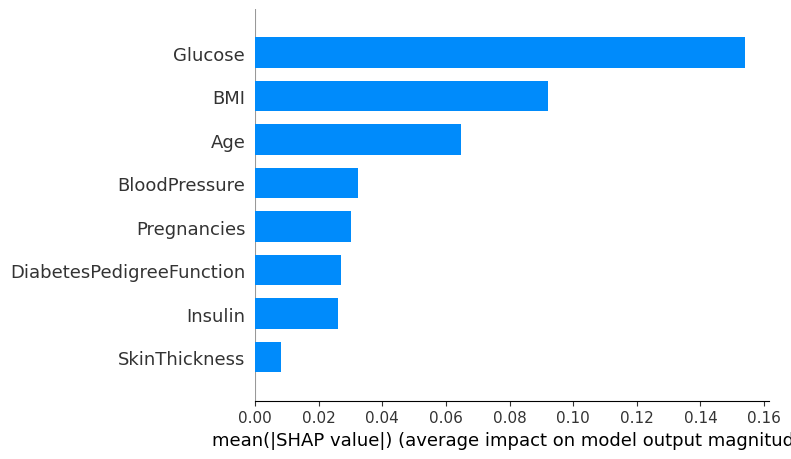

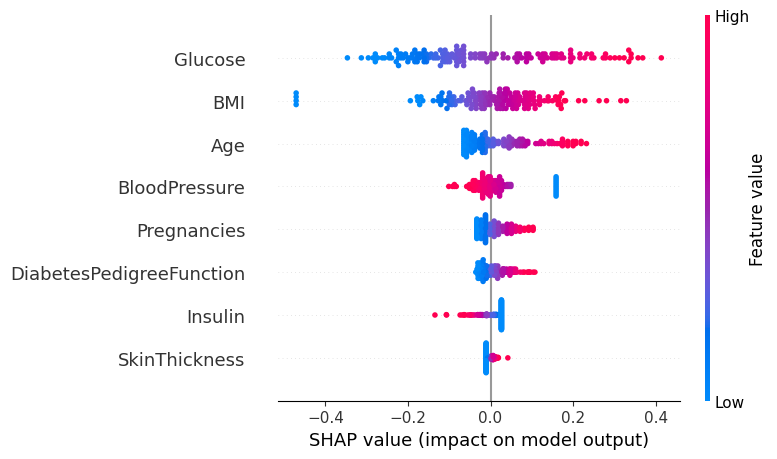

Model Coefficients:
                    Feature  Coefficient
0               Pregnancies     0.010468
1                   Glucose     0.005634
2             BloodPressure    -0.002281
3             SkinThickness     0.000532
4                   Insulin    -0.000278
5                       BMI     0.015039
6  DiabetesPedigreeFunction     0.111263
7                       Age     0.006460

Intercept: -0.9488
Baseline (mean outcome): 0.3469

Sample Predictions with SHAP Values:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.029625 -0.143993       0.026506       0.006795 -0.026482  0.040364   
1    -0.012248 -0.065124      -0.012272       0.006263  0.026365  0.065929   
2    -0.012248 -0.087658       0.012819      -0.010764  0.026365 -0.007760   
3     0.050561 -0.093291      -0.023677      -0.010764  0.026365 -0.101000   
4     0.040093  0.070081      -0.046487      -0.010764  0.026365 -0.021295   

   DiabetesPedigreeFunction       Age  Prediction  A

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap

df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
intercept = model.intercept_

baseline = y_train.mean()

explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

shap_df = pd.DataFrame(shap_values, columns=X.columns)
shap_df['Prediction'] = model.predict(X_test)
shap_df['Actual'] = y_test.values
shap_df['Difference'] = shap_df['Prediction'] - shap_df['Actual']
shap_df['Prediction_Type'] = np.where(shap_df['Difference'] > 0, 'Overprediction',
                                    np.where(shap_df['Difference'] < 0, 'Underprediction', 'Exact'))

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

print("Model Coefficients:")
print(coefficients)
print(f"\nIntercept: {intercept:.4f}")
print(f"Baseline (mean outcome): {baseline:.4f}")

print("\nSample Predictions with SHAP Values:")
print(shap_df.head())

mae = np.mean(np.abs(shap_df['Difference']))
r2 = model.score(X_test, y_test)
print(f"\nModel Performance - MAE: {mae:.4f}, R-squared: {r2:.4f}")

4 Regression with Student Performance Dataset  
Objective:
Investigate how student background and behavior influence final exam scores using Multiple Linear
Regression and SHAP value analysis.
 Tasks
1. Perform Multiple Linear Regression Analysis
• Use all relevant student attributes (e.g., study time, parental education, absences, etc.)
as independent variables.
• Fit a regression model to predict the final exam score.
2. Calculate the Baseline Value
• Compute the mean of the final exam scores from the training set.
• This serves as the baseline prediction (expected value).
3. Calculate SHAP Values
• Use SHAP to compute the contribution of each student attribute to the final exam score
prediction.
• Distribute the prediction deviation from the baseline among the features.
4. Compute Final Prediction for Each Record
• For each student record, confirm:
Predicted Score = Baseline + SHAP(Feature₁) + SHAP(Feature₂) + ... + SHAP(Featureₙ)
5. Interpret the Results
• For every prediction:
o Explain how different features (e.g., study time, failures, health) impacted the
exam score.
o Compare predicted score to actual score.
o Comment on overprediction or underprediction and possible reasons behind it.

Mean Squared Error: 4.082628398521859
R² Score: 0.9889832909573145


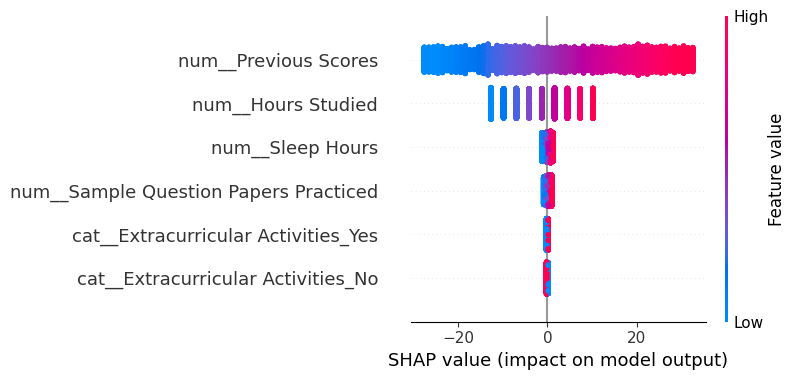

   Actual  Predicted  Predicted_Rounded
0    51.0  54.711854               55.0
1    20.0  22.615513               23.0
2    46.0  47.903145               48.0
3    28.0  31.289767               31.0
4    41.0  43.004570               43.0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import matplotlib.pyplot as plt


# 1. Load Dataset

df = pd.read_csv("/content/Student_Performance.csv")  # Change to your file path

target_col = "Performance Index"

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found. Available columns: {df.columns.tolist()}")


# 2. Features & Target

X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# 3. Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


# 4. Model Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# 5. Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6. Train Model

model.fit(X_train, y_train)


# 7. Predictions

y_pred = model.predict(X_test)
y_pred_rounded = np.rint(y_pred)


# 8. Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


# 9. SHAP Explainability

# Get transformed training data for SHAP
X_train_transformed = preprocessor.fit_transform(X_train)

explainer = shap.Explainer(model.named_steps['regressor'], X_train_transformed)
shap_values = explainer(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=preprocessor.get_feature_names_out())


# 10. Optional: Compare Actual vs Predicted

results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Predicted_Rounded": y_pred_rounded
})
print(results_df.head())